# INTRODUCCION

El problema con el entrenamiento de redes neuronales está en la elección del número de épocas de entrenamiento a utilizar.

Demasiadas épocas pueden provocar un sobreajuste del conjunto de datos de entrenamiento, mientras que muy pocas pueden dar lugar a un modelo insuficiente. La detención anticipada es un método que le permite especificar una cantidad arbitrariamente grande de épocas de entrenamiento y detener el entrenamiento una vez que el rendimiento del modelo deja de mejorar en un conjunto de datos de validación retenido.

# EARLYSTOPPING

**Keras** admite la interrupción anticipada del entrenamiento mediante una devolución de llamada llamada EarlyStopping.

Esta devolución de llamada le permite especificar la medida de rendimiento a monitorear, el desencadenante y, una vez activado, detendrá el proceso de capacitación.

La devolución de llamada **EarlyStopping** se configura cuando se crea una instancia mediante argumentos.

El “**monitor**” le permite especificar la medida de desempeño a monitorear para finalizar la capacitación. Recuerde  el cálculo de medidas en el conjunto de datos de validación tendrá el prefijo 'val_', como 'val_loss' para la pérdida en el conjunto de datos de validación.

#es = EarlyStopping(monitor='val_loss')






Según la elección de la medida de desempeño, el argumento de la “moda” deberá especificarse si el objetivo de la métrica elegida es aumentar (maximizar o “max”) o disminuir (minimizar o “min”).

Por ejemplo, buscaríamos un mínimo para la pérdida de validación y un mínimo para el error cuadrático medio de validación, mientras que buscaríamos un máximo para la precisión de la validación.

# es = EarlyStopping(monitor='val_loss', mode='min')

De forma predeterminada, el modo está configurado en "automático" y sabe que desea minimizar la pérdida o maximizar la precisión.

Eso es todo lo que se necesita para la forma más sencilla de detener el entrenamiento anticipadamente. El entrenamiento se detendrá cuando la medida de desempeño elegida deje de mejorar. Para descubrir la época de entrenamiento en la que se detuvo el entrenamiento, el argumento "verbose" se puede establecer en 1. Una vez detenido, la devolución de llamada imprimirá el número de época.

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

A menudo, la primera señal de que no hay mejoría puede no ser el mejor momento para dejar de entrenar. Esto se debe a que el modelo puede llegar a una meseta sin mejora o incluso empeorar ligeramente antes de mejorar mucho.

Podemos explicar esto agregando un retraso al activador en términos del número de épocas en las que nos gustaría ver que no haya mejora. Esto se puede hacer estableciendo el argumento "paciencia".

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

La cantidad exacta de paciencia variará según los modelos y los problemas. Revisar los gráficos de su medida de rendimiento puede ser muy útil para tener una idea de qué tan ruidoso puede ser el proceso de optimización de su modelo en sus datos.

Por defecto, cualquier cambio en la medida de desempeño, sin importar cuán fraccionario sea, se considerará una mejora. Es posible que desee considerar una mejora que sea un incremento específico, como 1 unidad para el error cuadrático medio o 1% para la precisión. Esto se puede especificar mediante el argumento "min_delta".

#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

Finalmente, puede ser deseable detener el entrenamiento sólo si el rendimiento se mantiene por encima o por debajo de un umbral o línea de base determinado. Por ejemplo, si está familiarizado con el entrenamiento del modelo (por ejemplo, curvas de aprendizaje) y sabe que una vez que se logra una pérdida de validación de un valor determinado, no tiene sentido continuar con el entrenamiento. Esto se puede especificar estableciendo el argumento "línea de base".

Esto podría ser más útil al ajustar un modelo, después de que hayan pasado las grandes fluctuaciones iniciales en la medida de rendimiento que se observan en las primeras etapas del entrenamiento de un nuevo modelo.

# es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

La devolución de llamada **EarlyStopping** detendrá el entrenamiento una vez que se active, pero es posible que el modelo al final del entrenamiento no sea el modelo con mejor rendimiento en el conjunto de datos de validación.

Se requiere una devolución de llamada adicional que guardará el mejor modelo observado durante el entrenamiento para su uso posterior. Esta es la devolución de llamada de **ModelCheckpoint**.

La devolución de llamada de **ModelCheckpoint** es flexible en la forma en que se puede usar, pero en este caso la usaremos solo para guardar el mejor modelo observado durante el entrenamiento según lo definido por una medida de rendimiento elegida en el conjunto de datos de validación.

Para guardar y cargar modelos es necesario tener instalado soporte HDF5 en su estación de trabajo. Por ejemplo, usando el instalador pip Python, esto se puede lograr de la siguiente manera:

In [ ]:
!pip install h5py

La devolución de llamada guardará el modelo en un archivo, lo que requiere que se especifique una ruta y un nombre de archivo mediante el primer argumento.

# from tensorflow.keras.callbacks import ModelCheckpoint
# mc = ModelCheckpoint('best_model.h5')

La función de pérdida preferida a monitorear se puede especificar mediante el argumento monitor, de la misma manera que la devolución de llamada EarlyStopping. Por ejemplo, pérdida en el conjunto de datos de validación (el valor predeterminado).

Además, al igual que con la devolución de llamada EarlyStopping, debemos especificar el "modo" para minimizar o maximizar la medida de rendimiento. Nuevamente, el valor predeterminado es "automático", que tiene en cuenta las medidas de desempeño estándar.
Finalmente, solo nos interesa el mejor modelo observado durante el entrenamiento, en lugar del mejor comparado con la época anterior, que podría no ser el mejor en general si el entrenamiento es ruidoso. Esto se puede lograr estableciendo el argumento "save_best_only" en Verdadero.

# mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)


Luego, el modelo guardado se puede cargar y evaluar en cualquier momento llamando a la función load_model().

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Define el directorio donde se guardará el modelo
#directory = '/content/drive/MyDrive/mi_directorio/'

# carga el modelo
#from keras.models import load_model
#saved_model = load_model('best_model.h5')

# EJEMPLO

Usaremos un problema de clasificación binaria estándar que define dos semicírculos de observaciones, un semicírculo para cada clase.

Cada observación tiene dos variables de entrada con la misma escala y un valor de salida de clase de 0 o 1. Este conjunto de datos se denomina conjunto de datos "lunas" debido a la forma de las observaciones en cada clase cuando se representan.

Podemos usar la función make_moons() para generar observaciones de este problema. Agregaremos ruido a los datos y generaremos el generador de números aleatorios para que se generen las mismas muestras cada vez que se ejecute el código.

In [ ]:
from sklearn.datasets import make_moons

# Generar los datos usando make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)


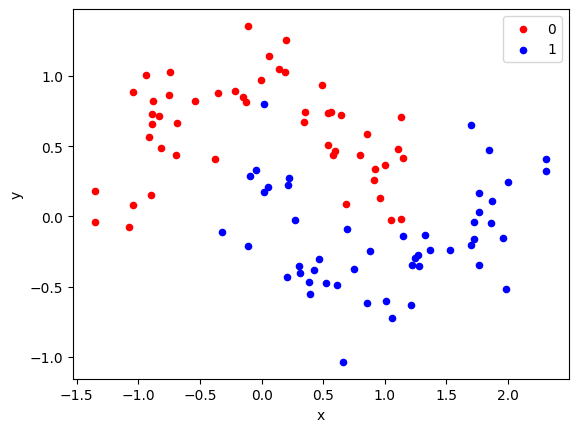

In [ ]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Antes de definir el modelo, dividiremos el conjunto de datos en conjuntos de entrenamiento y de prueba, usando 30 ejemplos para entrenar el modelo y 70 para evaluar el rendimiento del modelo de ajuste.

In [ ]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# define modelo
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [ ]:
# evaluamos el  modelo
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Finalmente, trazaremos la pérdida del modelo tanto en el tren como en el conjunto de prueba en cada época.

Si el modelo efectivamente se sobreajusta al conjunto de datos de entrenamiento, esperaríamos que el gráfico lineal de pérdida (y precisión) en el conjunto de entrenamiento continúe aumentando y que el conjunto de pruebas aumente y luego disminuya nuevamente a medida que el modelo aprende ruido estadístico en el conjunto de datos de entrenamiento. .

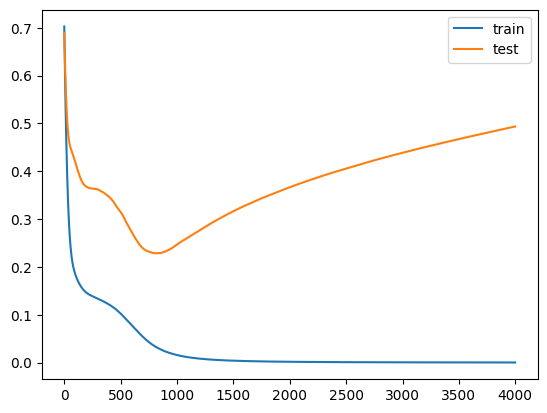

In [ ]:
# graficamos entrenamiento
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Podemos ver que el modelo tiene un mejor rendimiento en el conjunto de datos de entrenamiento que en el conjunto de datos de prueba, una posible señal de sobreajuste.

Podemos ver la forma esperada de un modelo sobreajustado donde la precisión de la prueba aumenta hasta cierto punto y luego comienza a disminuir nuevamente.

Al revisar la figura, también podemos ver puntos planos en los altibajos en la pérdida de validación. Cualquier parada anticipada tendrá que tener en cuenta estos comportamientos. También esperaríamos que un buen momento para dejar de entrenar fuera alrededor de la época 800.

# Aplicando EarlyStopping

Epoch 228: early stopping
Train: 0.967, Test: 0.814


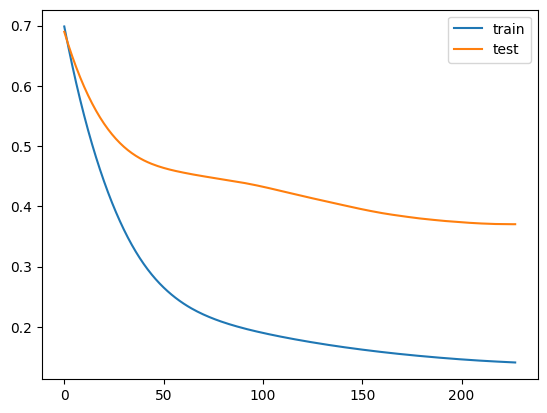

In [ ]:
# Detener overfitting con EarlyStopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generamos los datos
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# separamos entrenamiento y test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# definimos el  modelo
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#
# Aplicamos early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#
# Ejecutamos el modelo
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# Evaluamos el  modelo
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Graficamos
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Podemos ver que la devolución de llamada detuvo el entrenamiento en la época 200. Esto es demasiado pronto ya que esperaríamos que una parada temprana fuera alrededor de la época 800. Se destaca que la precisión de clasificación tanto en el conjunto de entrenamiento como en el de prueba, es peor que sin paradas anticipadas.

Podemos mejorar el desencadenante de la parada anticipada esperando un rato antes de detenernos.

Esto se puede lograr estableciendo el argumento de la “paciencia”.

En este caso, esperaremos 200 épocas antes de que se detenga el entrenamiento. Específicamente, esto significa que permitiremos que el entrenamiento continúe hasta 200 épocas adicionales después del punto en que la pérdida de validación comenzó a degradarse, dándole al proceso de entrenamiento la oportunidad de superar puntos planos o encontrar alguna mejora adicional.

Epoch 1026: early stopping
Train: 1.000, Test: 0.943


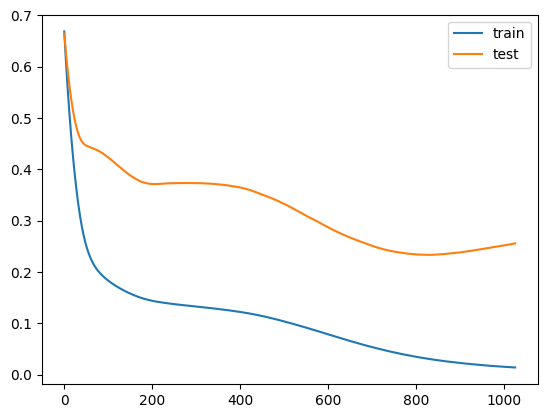

In [ ]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Al ejecutar el ejemplo, podemos ver que el entrenamiento se detuvo mucho más tarde, en este caso después de la época 1000.
También podemos ver que el rendimiento en el conjunto de datos de prueba es mejor que no utilizar ninguna parada anticipada.
Al revisar el gráfico de líneas de pérdida durante el entrenamiento, podemos ver que la paciencia permitió que el entrenamiento avanzara más allá de algunos pequeños puntos planos y malos.

También podemos ver que la pérdida de pruebas comenzó a aumentar nuevamente en las últimas 100 épocas aproximadamente.

Esto significa que aunque el rendimiento del modelo haya mejorado, es posible que no tengamos el modelo con mejor rendimiento o más estable al final del entrenamiento. Podemos solucionar esto utilizando una devolución de llamada ModelCheckpoint.

En este caso, nos interesa guardar el modelo con la mayor precisión en el conjunto de datos de prueba. También podríamos buscar el modelo con la mejor pérdida en el conjunto de datos de prueba, pero esto puede corresponder o no al modelo con la mejor precisión.

Esto resalta un concepto importante en la selección de modelos. La noción del "mejor" modelo durante la capacitación puede entrar en conflicto cuando se evalúa utilizando diferentes medidas de desempeño. Intente elegir modelos en función de la métrica mediante la cual serán evaluados y presentados en el dominio. En un problema de clasificación binaria equilibrada, lo más probable es que esto sea precisión de clasificación. Por lo tanto, utilizaremos la precisión en la validación en la devolución de llamada de ModelCheckpoint para guardar el mejor modelo observado durante el entrenamiento.

Durante el entrenamiento, todo el modelo se guardará en el archivo "best_model.h5" solo cuando la precisión del conjunto de datos de validación mejore en general durante todo el proceso de entrenamiento. Una salida detallada también nos informará sobre la época y el valor de precisión cada vez que el modelo se guarde en el mismo archivo (por ejemplo, sobrescrito).

Esta nueva devolución de llamada adicional se puede agregar a la lista de devoluciones de llamada al llamar a la función fit().

In [ ]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1: val_accuracy improved from -inf to 0.64286, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.64286 to 0.77143, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.77143 to 0.81429, saving model to best_model.h5

Epoch 4: val_accuracy did not improve from 0.81429

Epoch 5: val_accuracy did not improve from 0.81429


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: val_accuracy did not improve from 0.81429

Epoch 7: val_accuracy did not improve from 0.81429

Epoch 8: val_accuracy did not improve from 0.81429

Epoch 9: val_accuracy did not improve from 0.81429

Epoch 10: val_accuracy did not improve from 0.81429

Epoch 11: val_accuracy did not improve from 0.81429

Epoch 12: val_accuracy did not improve from 0.81429

Epoch 13: val_accuracy did not improve from 0.81429

Epoch 14: val_accuracy did not improve from 0.81429

Epoch 15: val_accuracy did not improve from 0.81429

Epoch 16: val_accuracy did not improve from 0.81429

Epoch 17: val_accuracy did not improve from 0.81429

Epoch 18: val_accuracy did not improve from 0.81429

Epoch 19: val_accuracy did not improve from 0.81429

Epoch 20: val_accuracy did not improve from 0.81429

Epoch 21: val_accuracy did not improve from 0.81429

Epoch 22: val_accuracy did not improve from 0.81429

Epoch 23: val_accuracy did not improve from 0.81429

Epoch 24: val_accuracy did not improve from 0.814

Al ejecutar el ejemplo, podemos ver el resultado detallado de la devolución de llamada de ModelCheckpoint tanto cuando se guarda un nuevo mejor modelo como cuando no se observa ninguna mejora.

Podemos ver que el mejor modelo se observó en la época 860 durante esta ejecución. Aunque el EarlyStopping continuó ejecutando después de la época 1000, dado que la paciencia indicada es de 200 para el modelo.